In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image

In [2]:
dataset = pd.read_csv("Suicides in India 2001-2012.csv")
dataset.head()

State  Year Type_code                                     Type  \
0  A & N Islands  2001    Causes                       Illness (Aids/STD)   
1  A & N Islands  2001    Causes  Bankruptcy or Sudden change in Economic   
2  A & N Islands  2001    Causes  Cancellation/Non-Settlement of Marriage   
3  A & N Islands  2001    Causes        Physical Abuse (Rape/Incest Etc.)   
4  A & N Islands  2001    Causes                            Dowry Dispute   

   Gender Age_group  Total  
0  Female      0-14      0  
1  Female      0-14      0  
2  Female      0-14      0  
3  Female      0-14      0  
4  Female      0-14      0

In [3]:
dataset.head(10)

State  Year Type_code                                     Type  \
0  A & N Islands  2001    Causes                       Illness (Aids/STD)   
1  A & N Islands  2001    Causes  Bankruptcy or Sudden change in Economic   
2  A & N Islands  2001    Causes  Cancellation/Non-Settlement of Marriage   
3  A & N Islands  2001    Causes        Physical Abuse (Rape/Incest Etc.)   
4  A & N Islands  2001    Causes                            Dowry Dispute   
5  A & N Islands  2001    Causes                          Family Problems   
6  A & N Islands  2001    Causes      Ideological Causes/Hero Worshipping   
7  A & N Islands  2001    Causes                  Other Prolonged Illness   
8  A & N Islands  2001    Causes                         Property Dispute   
9  A & N Islands  2001    Causes                Fall in Social Reputation   

   Gender Age_group  Total  
0  Female      0-14      0  
1  Female      0-14      0  
2  Female      0-14      0  
3  Female      0-14      0  
4  Female      0-14      0  
5  Female      0-14      0  
6  Female      0-14      0  
7  Female      0-14      0  
8  Female      0-14      0  
9  Female      0-14      0

In [4]:
print(f"The size of the dataset:\n Rows:{dataset.shape[0]}\tColumns:{dataset.shape[1]}")

The size of the dataset:
 Rows:237519	Columns:7


In [5]:
#checking for null values
dataset.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [7]:
len(dataset[dataset['Total'] == 0])

135481

In [8]:
dataset=dataset[(dataset['State']!='Total (All India)') & (dataset['State']!='Total (States)') & (dataset['State']!='Total (Uts)')]
dataset_causes = dataset[dataset['Type_code']=='Causes']

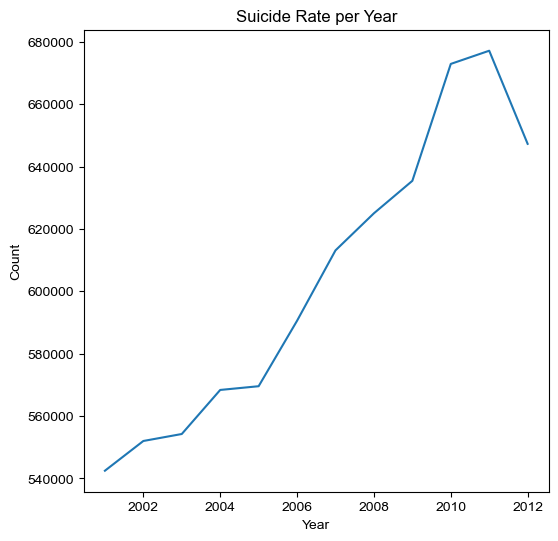

In [9]:
yearly_suicide_rates = dataset.groupby('Year')['Total'].sum()

# Plotting the data using line plot
plt.figure(figsize=(6, 6))
sns.lineplot(data=yearly_suicide_rates)
plt.title('Suicide Rate per Year')
plt.xlabel('Year')
plt.ylabel('Count')
sns.set_style('whitegrid')
plt.show()

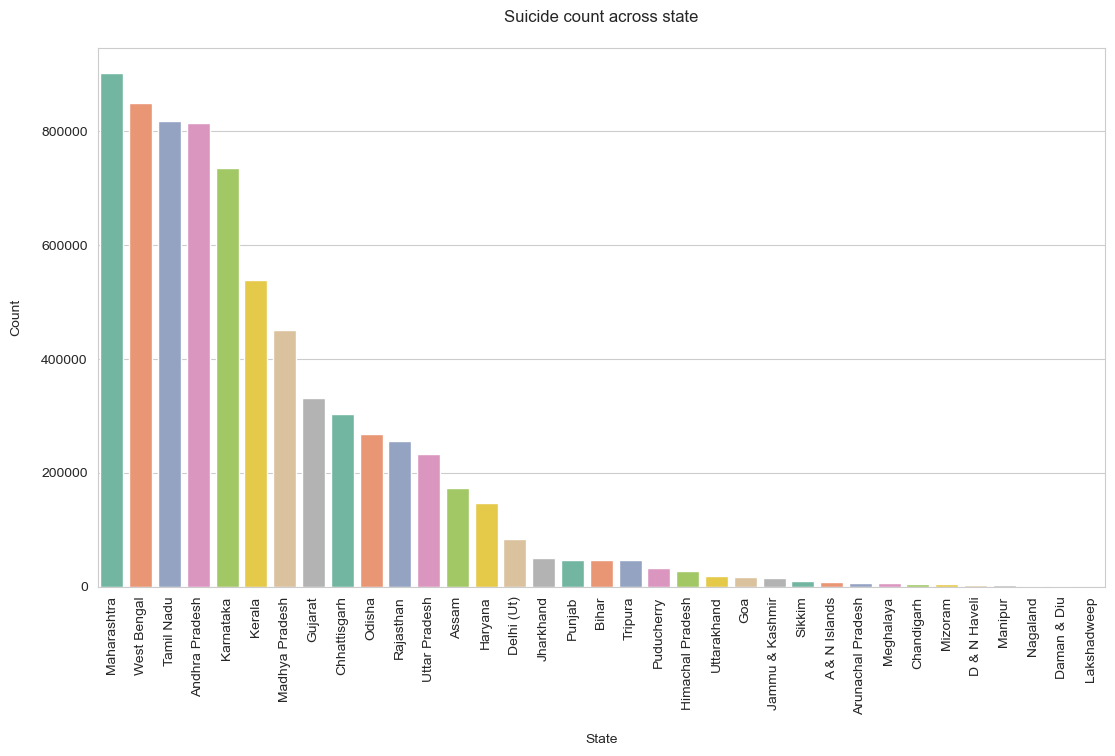

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

state = dataset.groupby('State').sum()['Total']
sort_state = state.sort_values(ascending=False)

plt.figure(figsize=(13, 7))
state_fig = sns.barplot(x=sort_state.index, y=sort_state.values, palette='Set2')
plt.title('Suicide count across state\n')
plt.xlabel('\nState')
plt.ylabel('Count\n')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
sns.set_style('whitegrid')
plt.show()

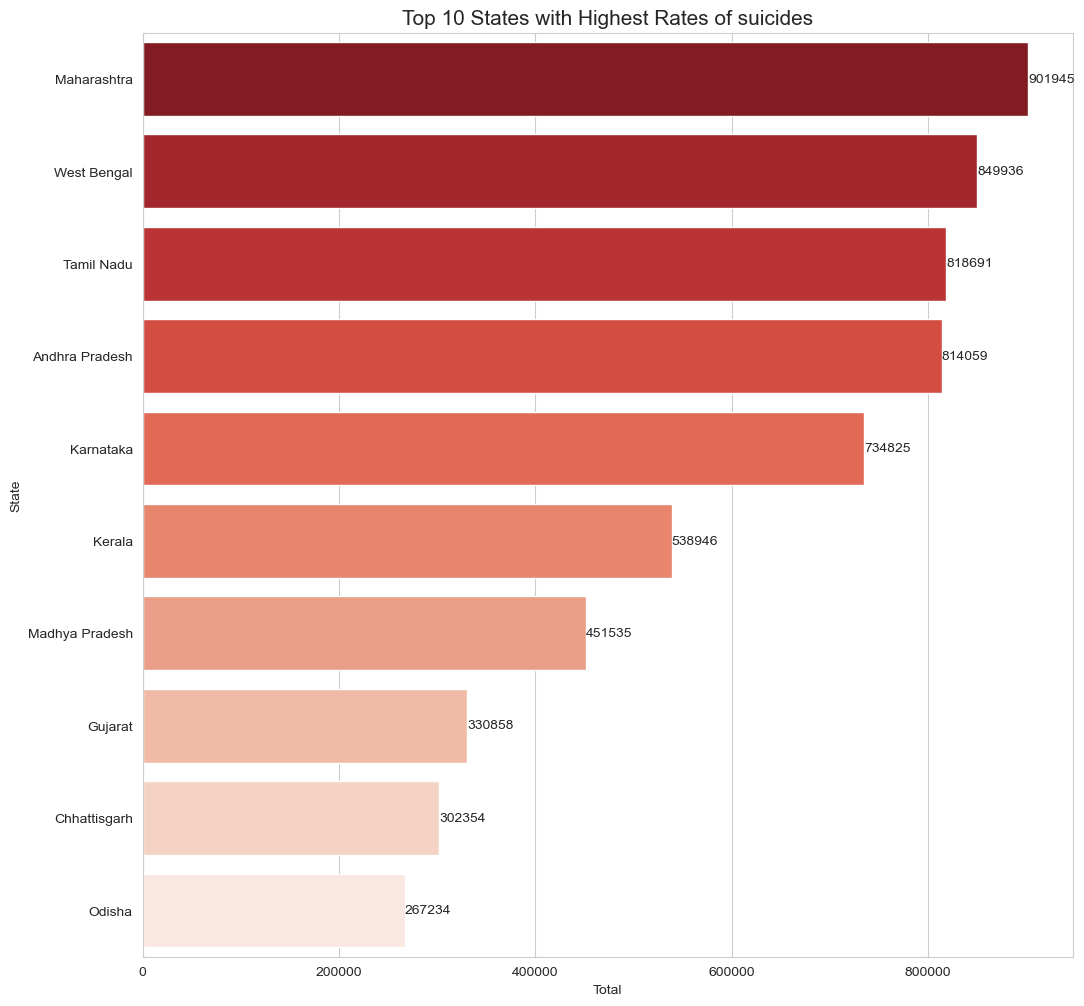

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

filter_state = dataset.groupby("State")[["State","Total"]].sum().sort_values('Total', ascending=False).head(10)
plt.figure(figsize=(12, 12))
plt.title("Top 10 States with Highest Rates of suicides", fontsize=15)
c1 = sns.barplot(x="Total", y=filter_state.index, data=filter_state, palette="Reds_r")
c1.bar_label(c1.containers[0], size=10)
plt.savefig("top10states_highsuicide.png")
plt.show()

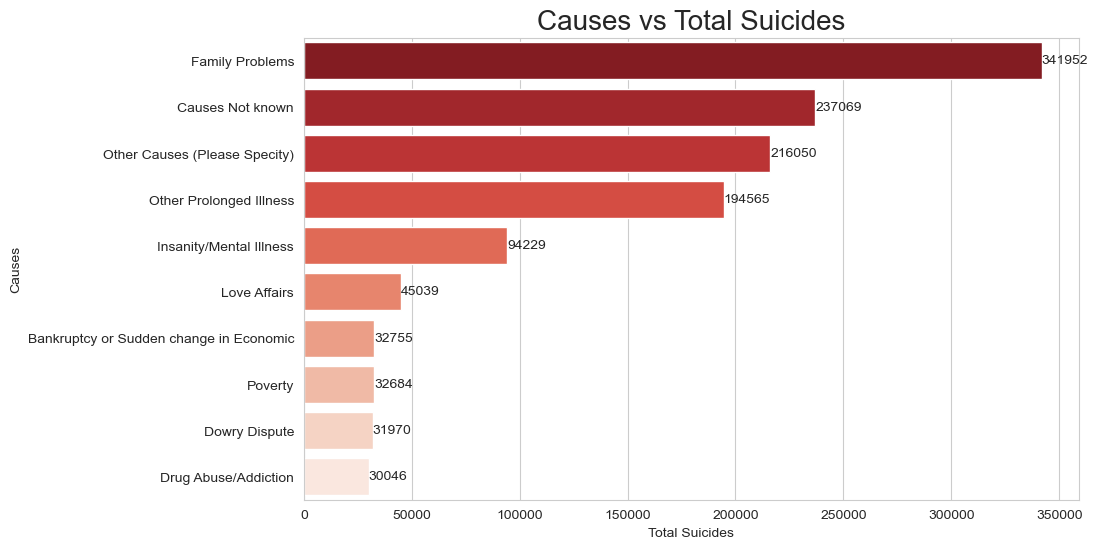

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(10,6))
temp = dataset_causes[['Type','Total']].groupby(['Type']).sum().sort_values('Total',ascending=False).head(10)
c1 = sns.barplot(y=temp.index,x=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size = 10)
plt.title('Causes vs Total Suicides',fontsize=20)
plt.xlabel('Total Suicides')
plt.ylabel('Causes')
plt.show()
plt.savefig("cause_suicide.png")

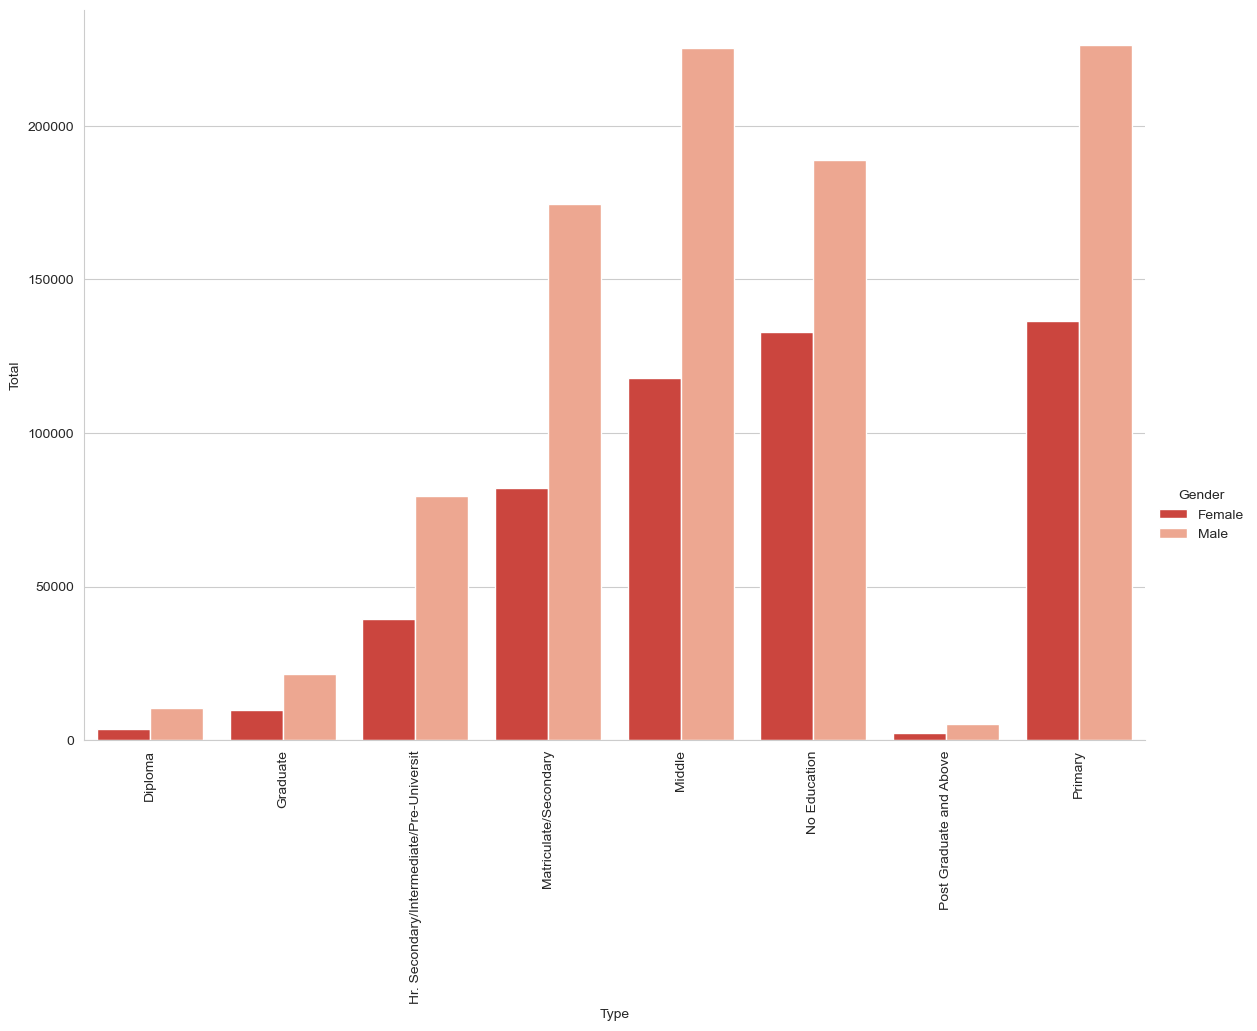

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

filter_social_status = pd.DataFrame(dataset[dataset["Type_code"] == "Education_Status"].groupby(["Type", "Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total", hue="Gender", kind="bar", palette="Reds_r", data=filter_social_status, height=8, aspect=11.7/8)
g.set_xticklabels(rotation=90)
plt.savefig("educationstatus.png")
plt.show()

In [14]:
import pandas as pd

st_yr_cause_df = (dataset.groupby(["State", "Gender", 'Year', "Type"])
        .agg(value=pd.NamedAgg(column="Total", aggfunc="sum"))['value']
        .unstack(fill_value=0)
        .rename_axis(None, axis=1)
        .unstack())
st_yr_cause_df['Total'] = st_yr_cause_df.sum(axis=1, numeric_only=True)
st_yr_cause_df.style.background_gradient(cmap='Reds')


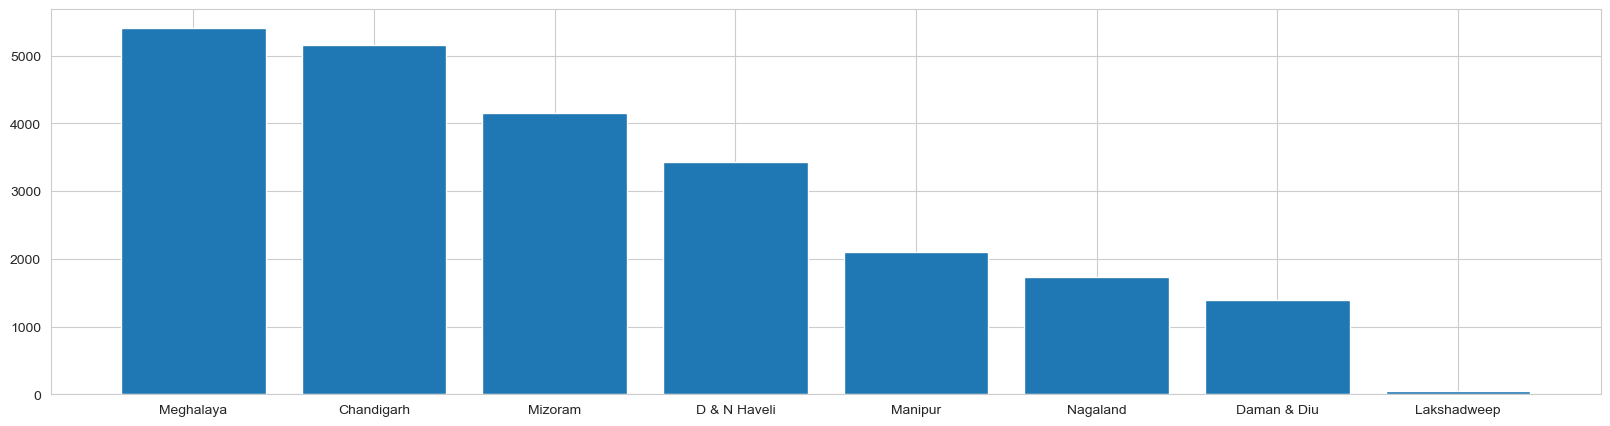

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

lst = pd.DataFrame(dataset.groupby('State')['Total'].sum().sort_values(ascending=False))
lst = lst.iloc[-8:]
plt.figure(figsize=(20, 5))
plt.bar(lst.index, lst['Total'])
plt.show()

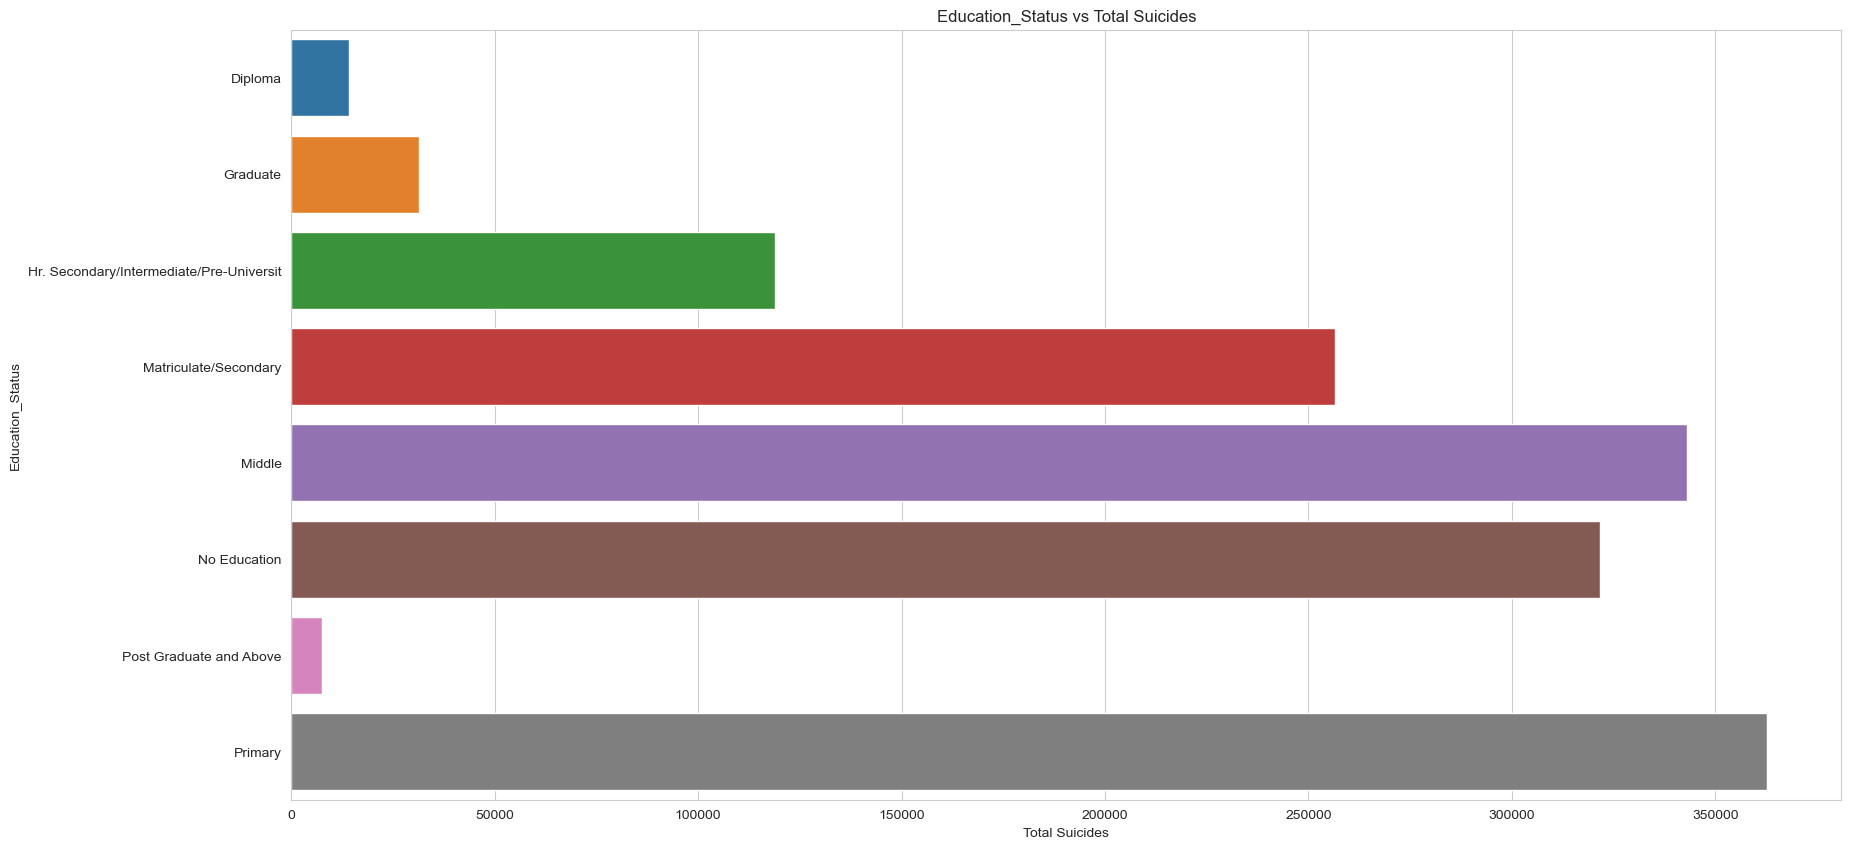

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
temp = dataset[dataset['Type_code'] == 'Education_Status'][['Type', 'Total']].groupby(['Type']).sum()
sns.barplot(y=temp.index, x=temp['Total'])
plt.title('Education_Status vs Total Suicides')
plt.xlabel('Total Suicides')
plt.ylabel('Education_Status')
plt.show()

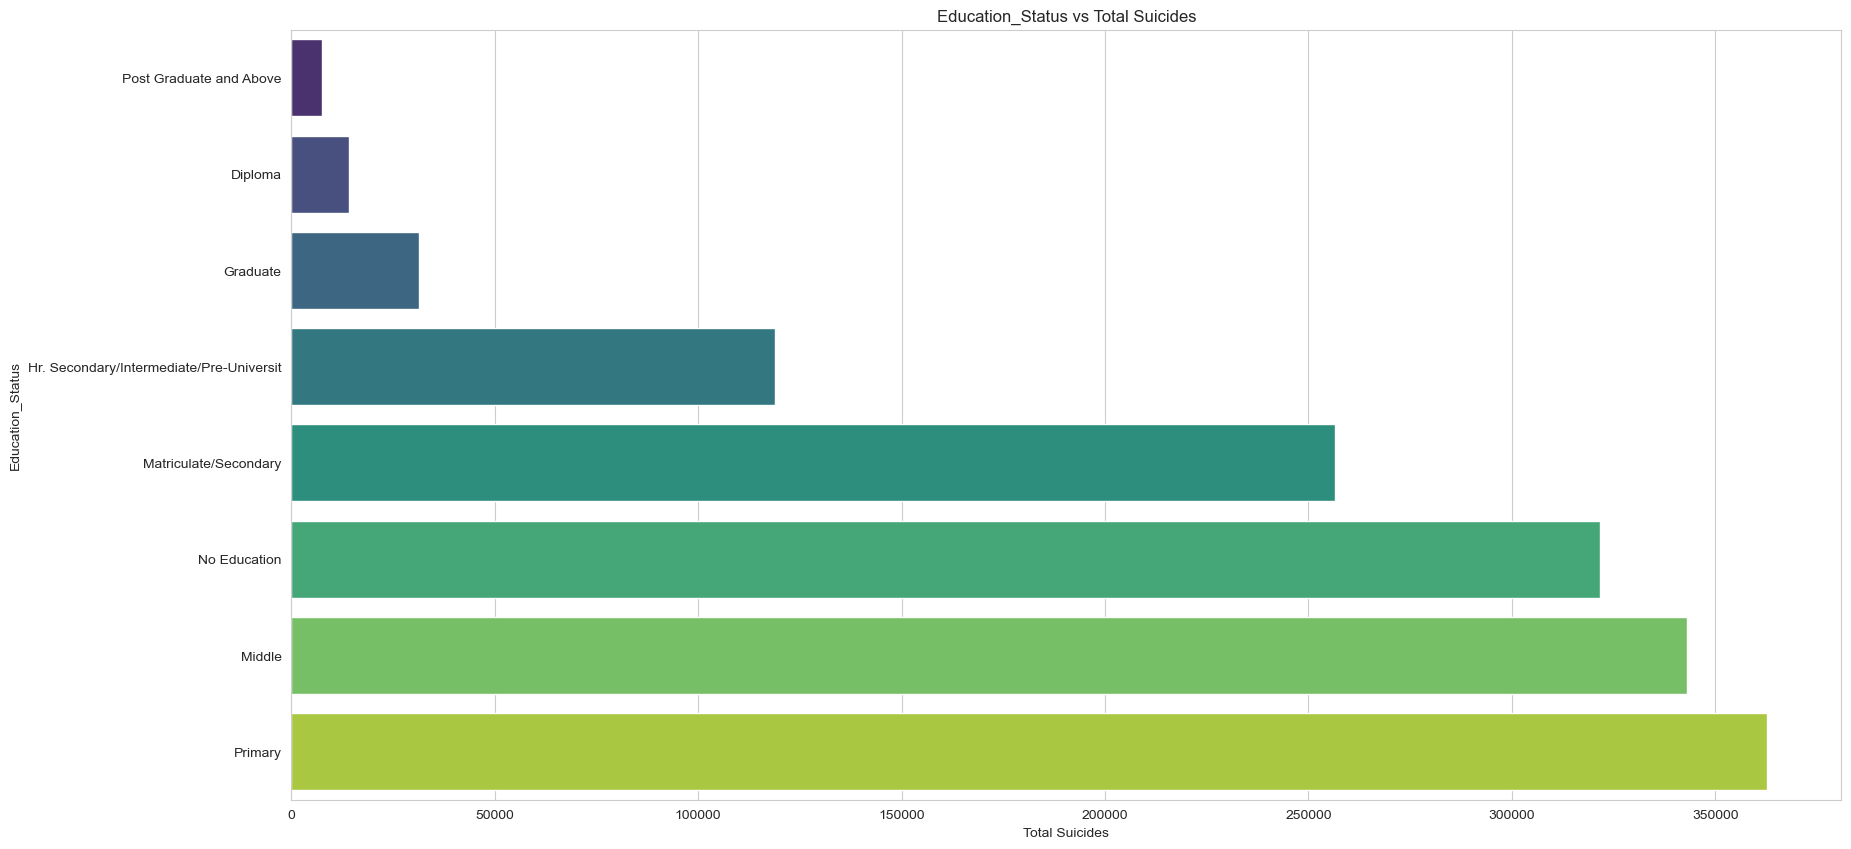

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is the DataFrame containing the relevant data

plt.figure(figsize=(20, 10))
temp = dataset[dataset['Type_code'] == 'Education_Status'][['Type', 'Total']].groupby(['Type']).sum()
temp = temp.sort_values('Total')  # Sort the DataFrame by 'Total' in ascending order
sns.barplot(y=temp.index, x=temp['Total'], palette='viridis')
plt.title('Education_Status vs Total Suicides')
plt.xlabel('Total Suicides')
plt.ylabel('Education_Status')
plt.show()


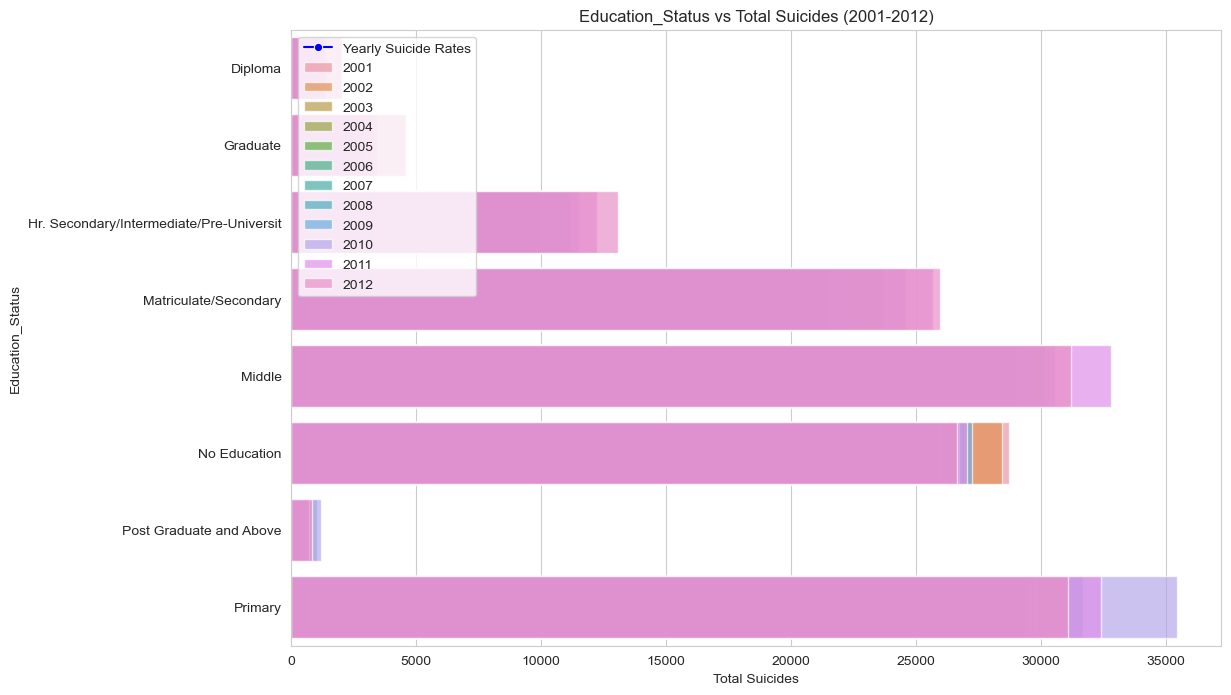

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a dataset named 'dataset' containing the relevant data
# and a column named 'Year' that represents the year of each data point

# Filter the dataset to include data from 2001 to 2012
dataset_filtered = dataset[(dataset['Year'] >= 2001) & (dataset['Year'] <= 2012)]

# Group by Year and Education_Status to get the total suicides for each combination
yearly_edu_suicides = dataset_filtered[dataset_filtered['Type_code'] == 'Education_Status'].groupby(['Year', 'Type'])['Total'].sum().reset_index()

# Line plot for yearly suicide rates
yearly_suicide_rates = dataset_filtered.groupby('Year')['Total'].sum()

plt.figure(figsize=(12, 8))

# Plot the line for yearly suicide rates
sns.lineplot(data=yearly_suicide_rates, marker='o', color='b', label='Yearly Suicide Rates')

# Create a bar plot for Education_Status vs Total Suicides
sns.barplot(y='Type', x='Total', hue='Year', data=yearly_edu_suicides, dodge=False, alpha=0.7)

plt.title('Education_Status vs Total Suicides (2001-2012)')
plt.xlabel('Total Suicides')
plt.ylabel('Education_Status')
plt.legend(loc='upper left')
sns.set_style('whitegrid')
plt.show()


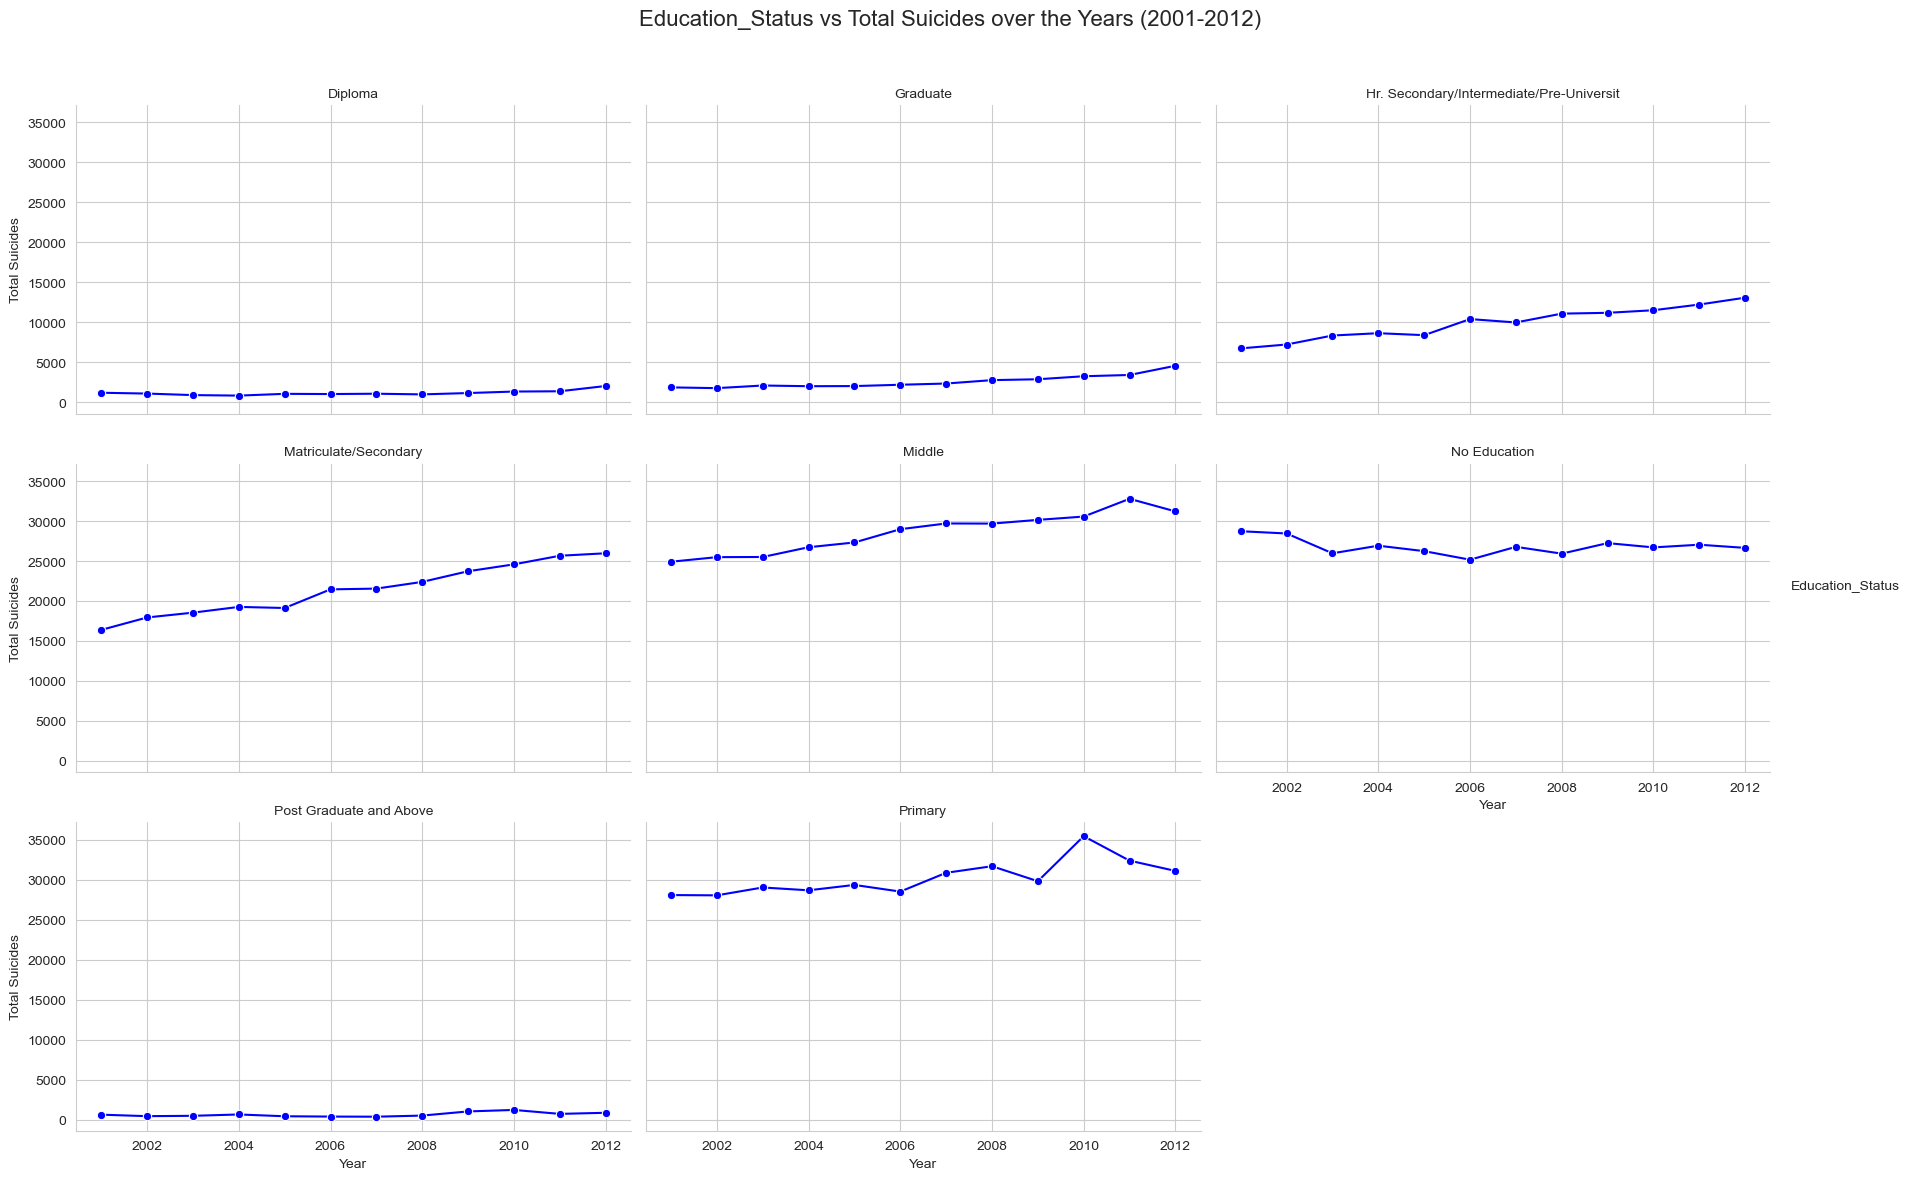

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a dataset named 'dataset' containing the relevant data
# and a column named 'Year' that represents the year of each data point

# Filter the dataset to include data from 2001 to 2012
dataset_filtered = dataset[(dataset['Year'] >= 2001) & (dataset['Year'] <= 2012)]

# Group by Year and Education_Status to get the total suicides for each combination
yearly_edu_suicides = dataset_filtered[dataset_filtered['Type_code'] == 'Education_Status'].groupby(['Year', 'Type'])['Total'].sum().reset_index()

# Create a facet grid for Education_Status vs Total Suicides over the years
g = sns.FacetGrid(yearly_edu_suicides, col='Type', col_wrap=3, height=4, aspect=1.5, sharex=True)
g.map_dataframe(sns.lineplot, x='Year', y='Total', marker='o', color='b')
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Year', 'Total Suicides')
g.add_legend(title='Education_Status')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Education_Status vs Total Suicides over the Years (2001-2012)', fontsize=16)

plt.show()


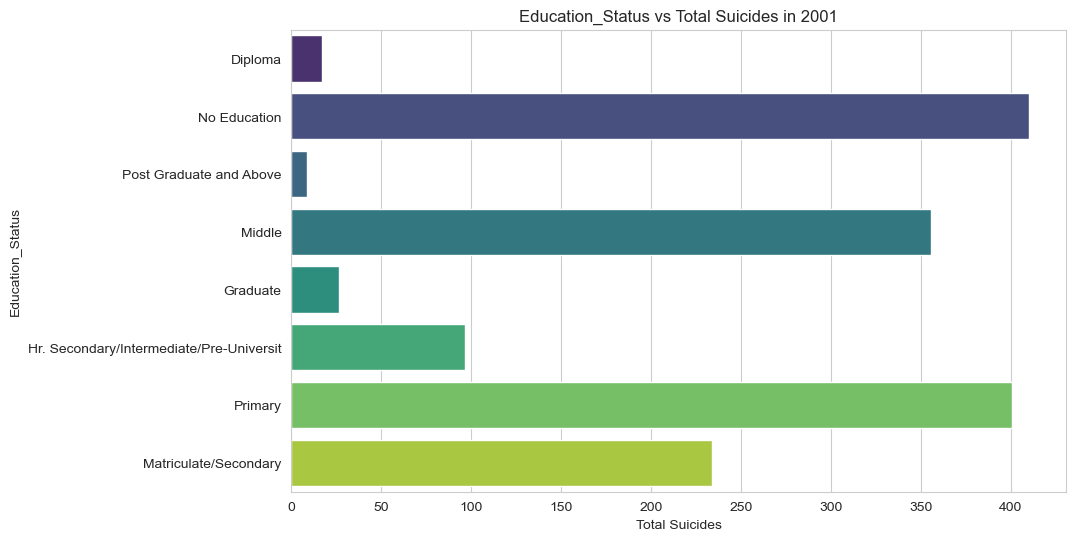

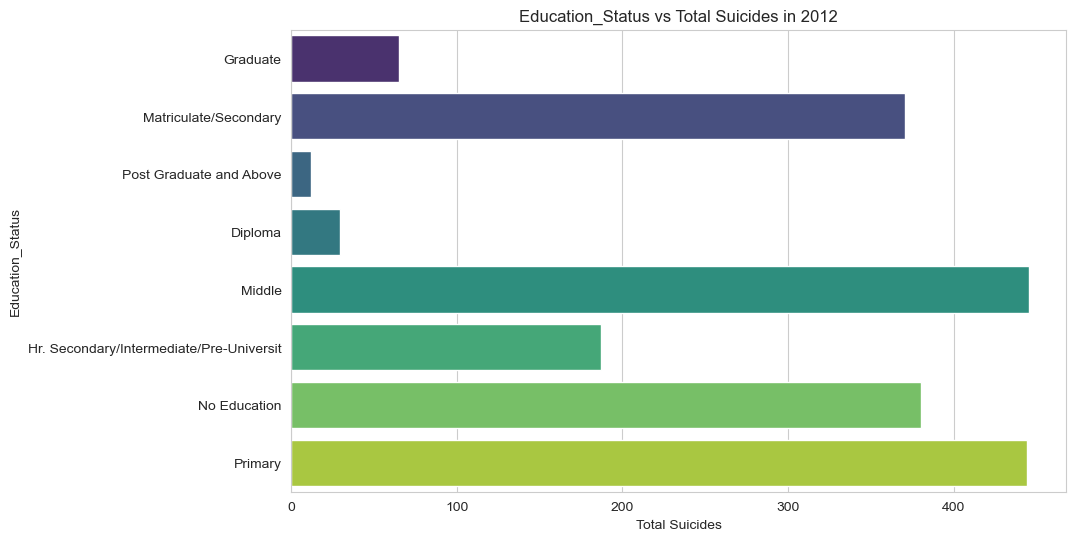

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a dataset named 'dataset' containing the relevant data

# Filter the dataset for 2001 and 2012
dataset_2001 = dataset[dataset['Year'] == 2001]
dataset_2012 = dataset[dataset['Year'] == 2012]

# Plot for Education_Status vs Total Suicides in 2001
plt.figure(figsize=(10, 6))
sns.barplot(data=dataset_2001[dataset_2001['Type_code'] == 'Education_Status'],
            x='Total', y='Type', ci=None, orient='h', palette='viridis')
plt.title('Education_Status vs Total Suicides in 2001')
plt.xlabel('Total Suicides')
plt.ylabel('Education_Status')
plt.show()

# Plot for Education_Status vs Total Suicides in 2012
plt.figure(figsize=(10, 6))
sns.barplot(data=dataset_2012[dataset_2012['Type_code'] == 'Education_Status'],
            x='Total', y='Type', ci=None, orient='h', palette='viridis')
plt.title('Education_Status vs Total Suicides in 2012')
plt.xlabel('Total Suicides')
plt.ylabel('Education_Status')
plt.show()


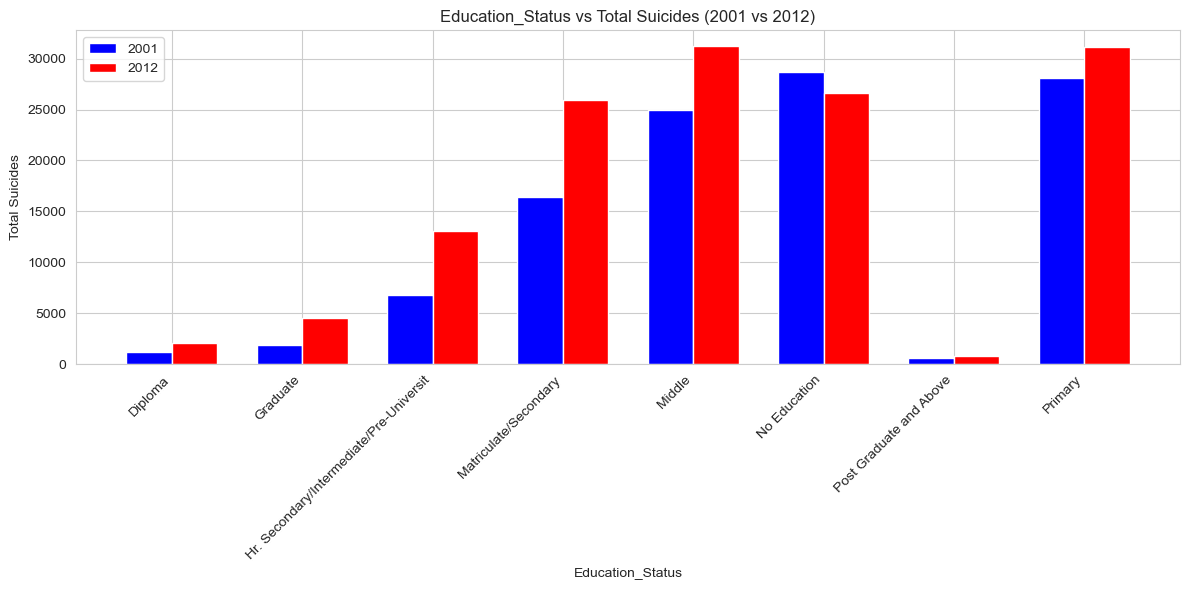

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a dataset named 'dataset' containing the relevant data

# Filter the dataset for 2001 and 2012
dataset_2001 = dataset[dataset['Year'] == 2001]
dataset_2012 = dataset[dataset['Year'] == 2012]

# Group by Education_Status to get the total suicides for each category in 2001 and 2012
dataset_2001_grouped = dataset_2001[dataset_2001['Type_code'] == 'Education_Status'].groupby('Type')['Total'].sum().reset_index()
dataset_2012_grouped = dataset_2012[dataset_2012['Type_code'] == 'Education_Status'].groupby('Type')['Total'].sum().reset_index()

# Combine the datasets for 2001 and 2012
combined_dataset = dataset_2001_grouped.merge(dataset_2012_grouped, on='Type', suffixes=('_2001', '_2012'))

# Plotting the clustered bar graph
plt.figure(figsize=(12, 6))
bar_width = 0.35

# Positions of the bars on the x-axis
bar_positions_2001 = range(len(combined_dataset))
bar_positions_2012 = [pos + bar_width for pos in bar_positions_2001]

# Plot the bars for 2001 and 2012
plt.bar(bar_positions_2001, combined_dataset['Total_2001'], width=bar_width, label='2001', color='blue')
plt.bar(bar_positions_2012, combined_dataset['Total_2012'], width=bar_width, label='2012', color='red')

# Set the x-axis labels and tick positions
plt.xticks([pos + bar_width / 2 for pos in bar_positions_2001], combined_dataset['Type'], rotation=45, ha='right')

plt.title('Education_Status vs Total Suicides (2001 vs 2012)')
plt.xlabel('Education_Status')
plt.ylabel('Total Suicides')
plt.legend()
plt.tight_layout()
plt.show()


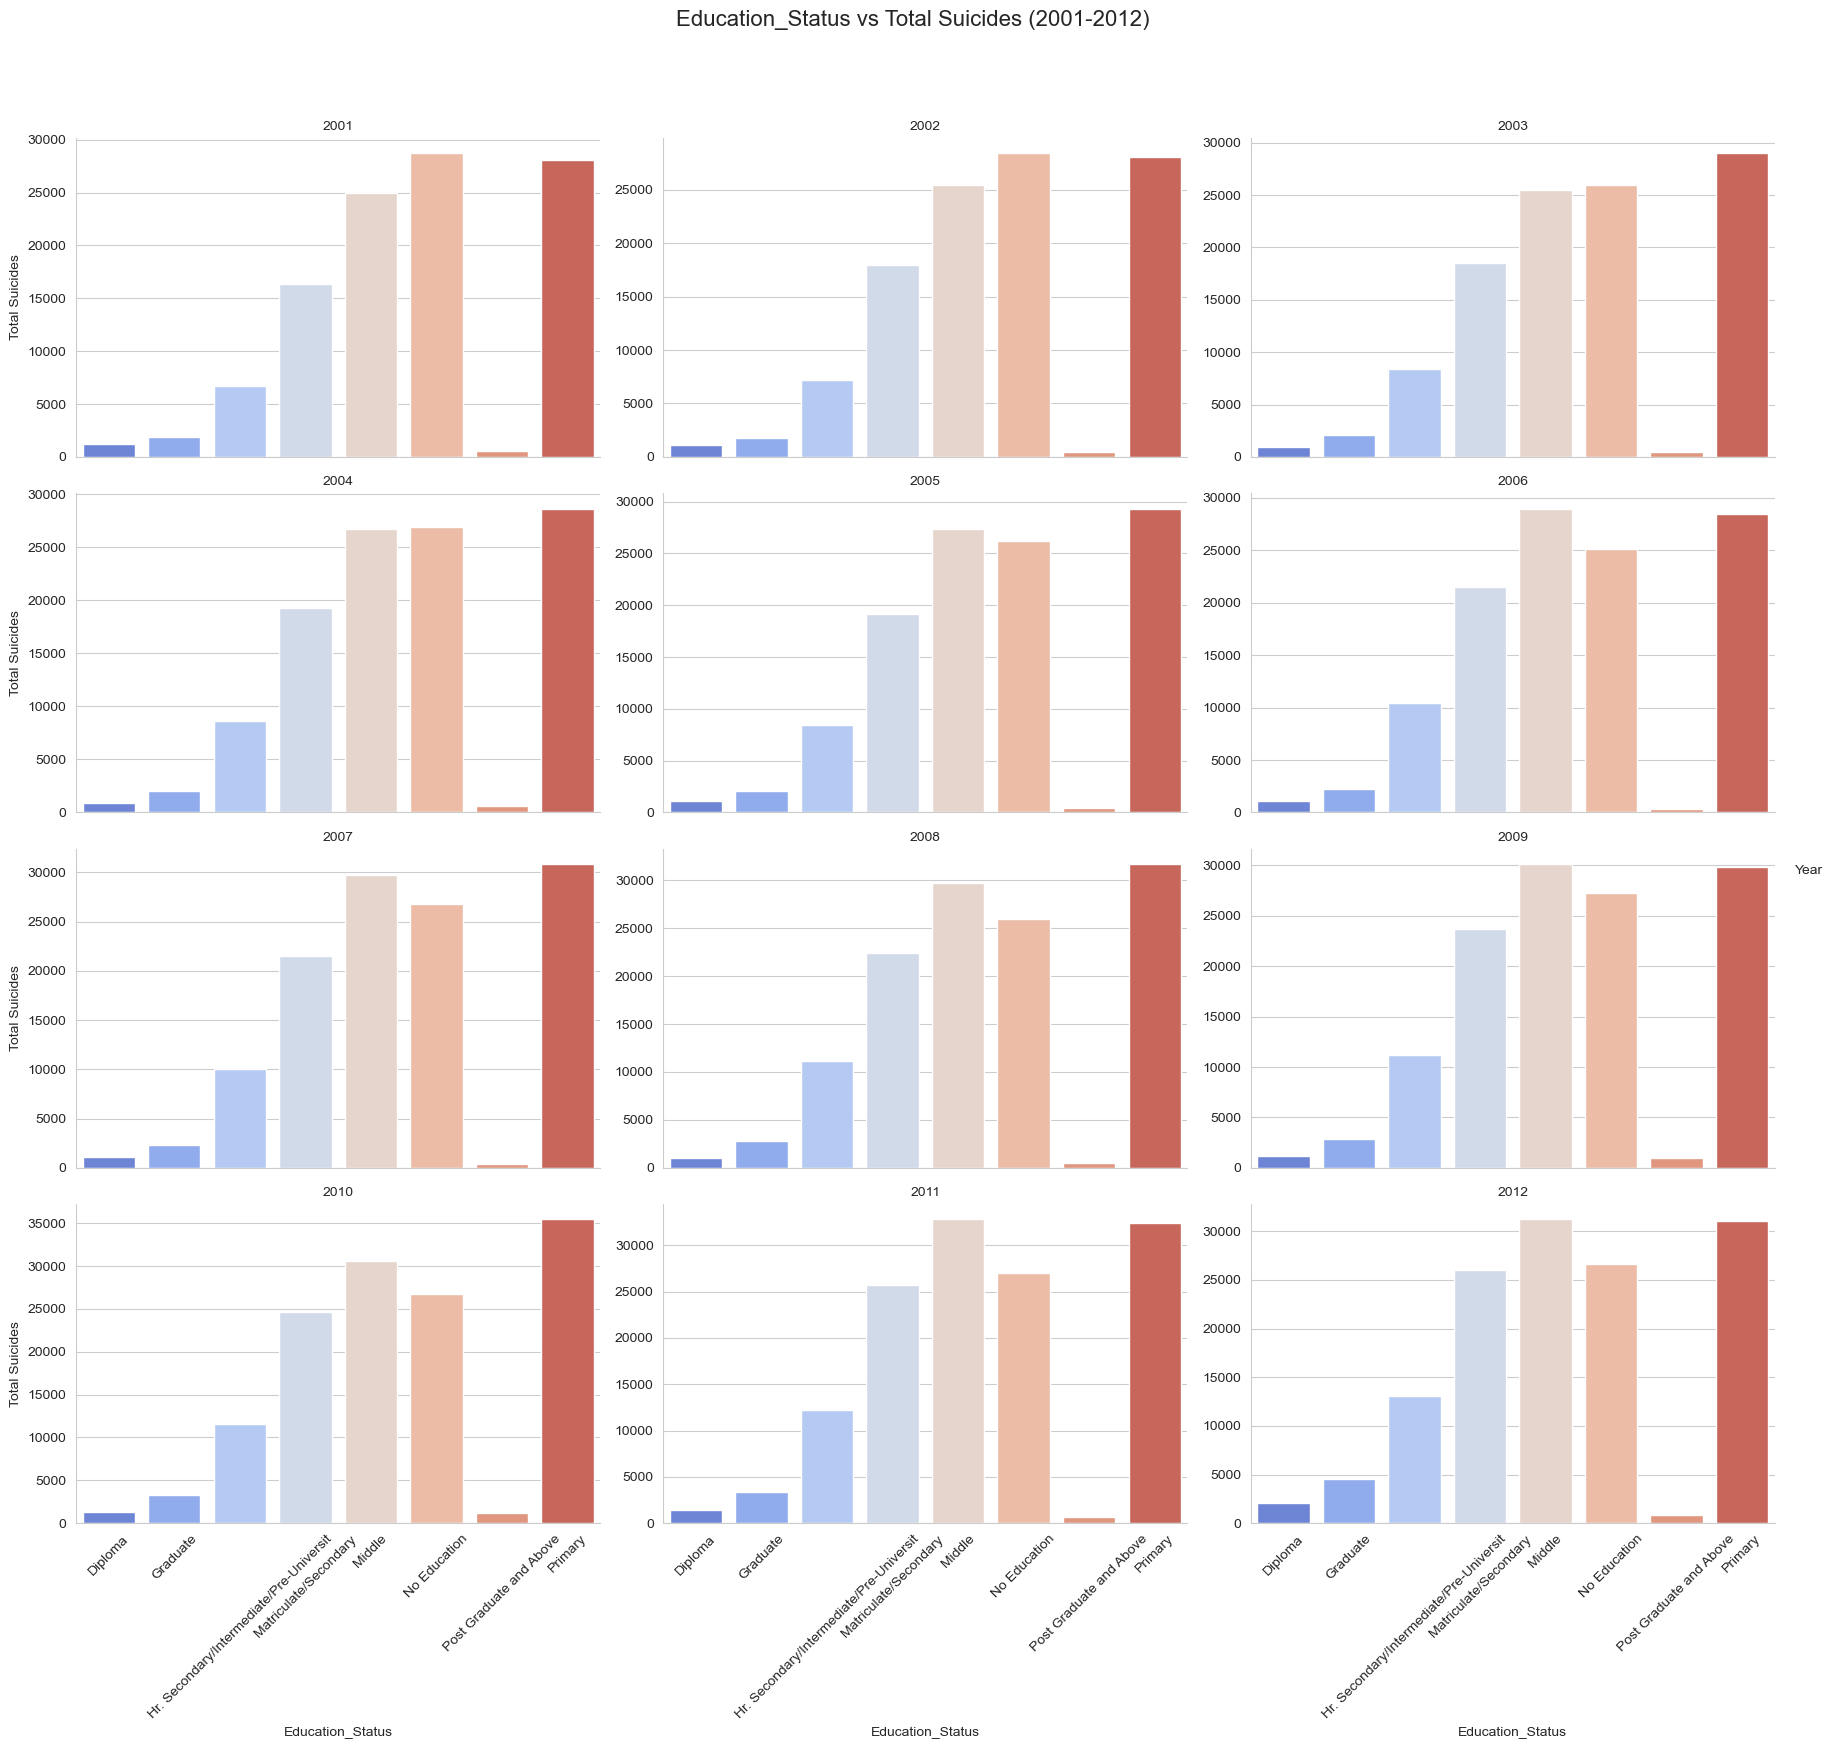

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a dataset named 'dataset' containing the relevant data

# Filter the dataset for years 2001 to 2012
dataset_filtered = dataset[(dataset['Year'] >= 2001) & (dataset['Year'] <= 2012)]

# Group by Education_Status and Year to get the total suicides for each combination
dataset_grouped = dataset_filtered[dataset_filtered['Type_code'] == 'Education_Status'].groupby(['Year', 'Type'])['Total'].sum().reset_index()

# Create a facet grid for Education_Status vs Total Suicides over the years
g = sns.FacetGrid(dataset_grouped, col='Year', col_wrap=3, height=4, aspect=1.5, sharey=False)
g.map_dataframe(sns.barplot, x='Type', y='Total', ci=None, palette='coolwarm')
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Education_Status', 'Total Suicides')
g.add_legend(title='Year')

# Rotate x-axis tick labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Education_Status vs Total Suicides (2001-2012)', fontsize=16)

plt.show()
